In [1]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
while os.getcwd().split('/')[-1] != 'imodels-experiments':
    os.chdir('..')

import viz

np.random.seed(0)

In [8]:
models_to_plot = ['cart', 'random_forest', 'gradient_boosting', 'rulefit', 'saps', 'grl', 'brs', 'skope_rules']
suffix = 'cv_mean'
metric = 'best_spec_0.9_sens'

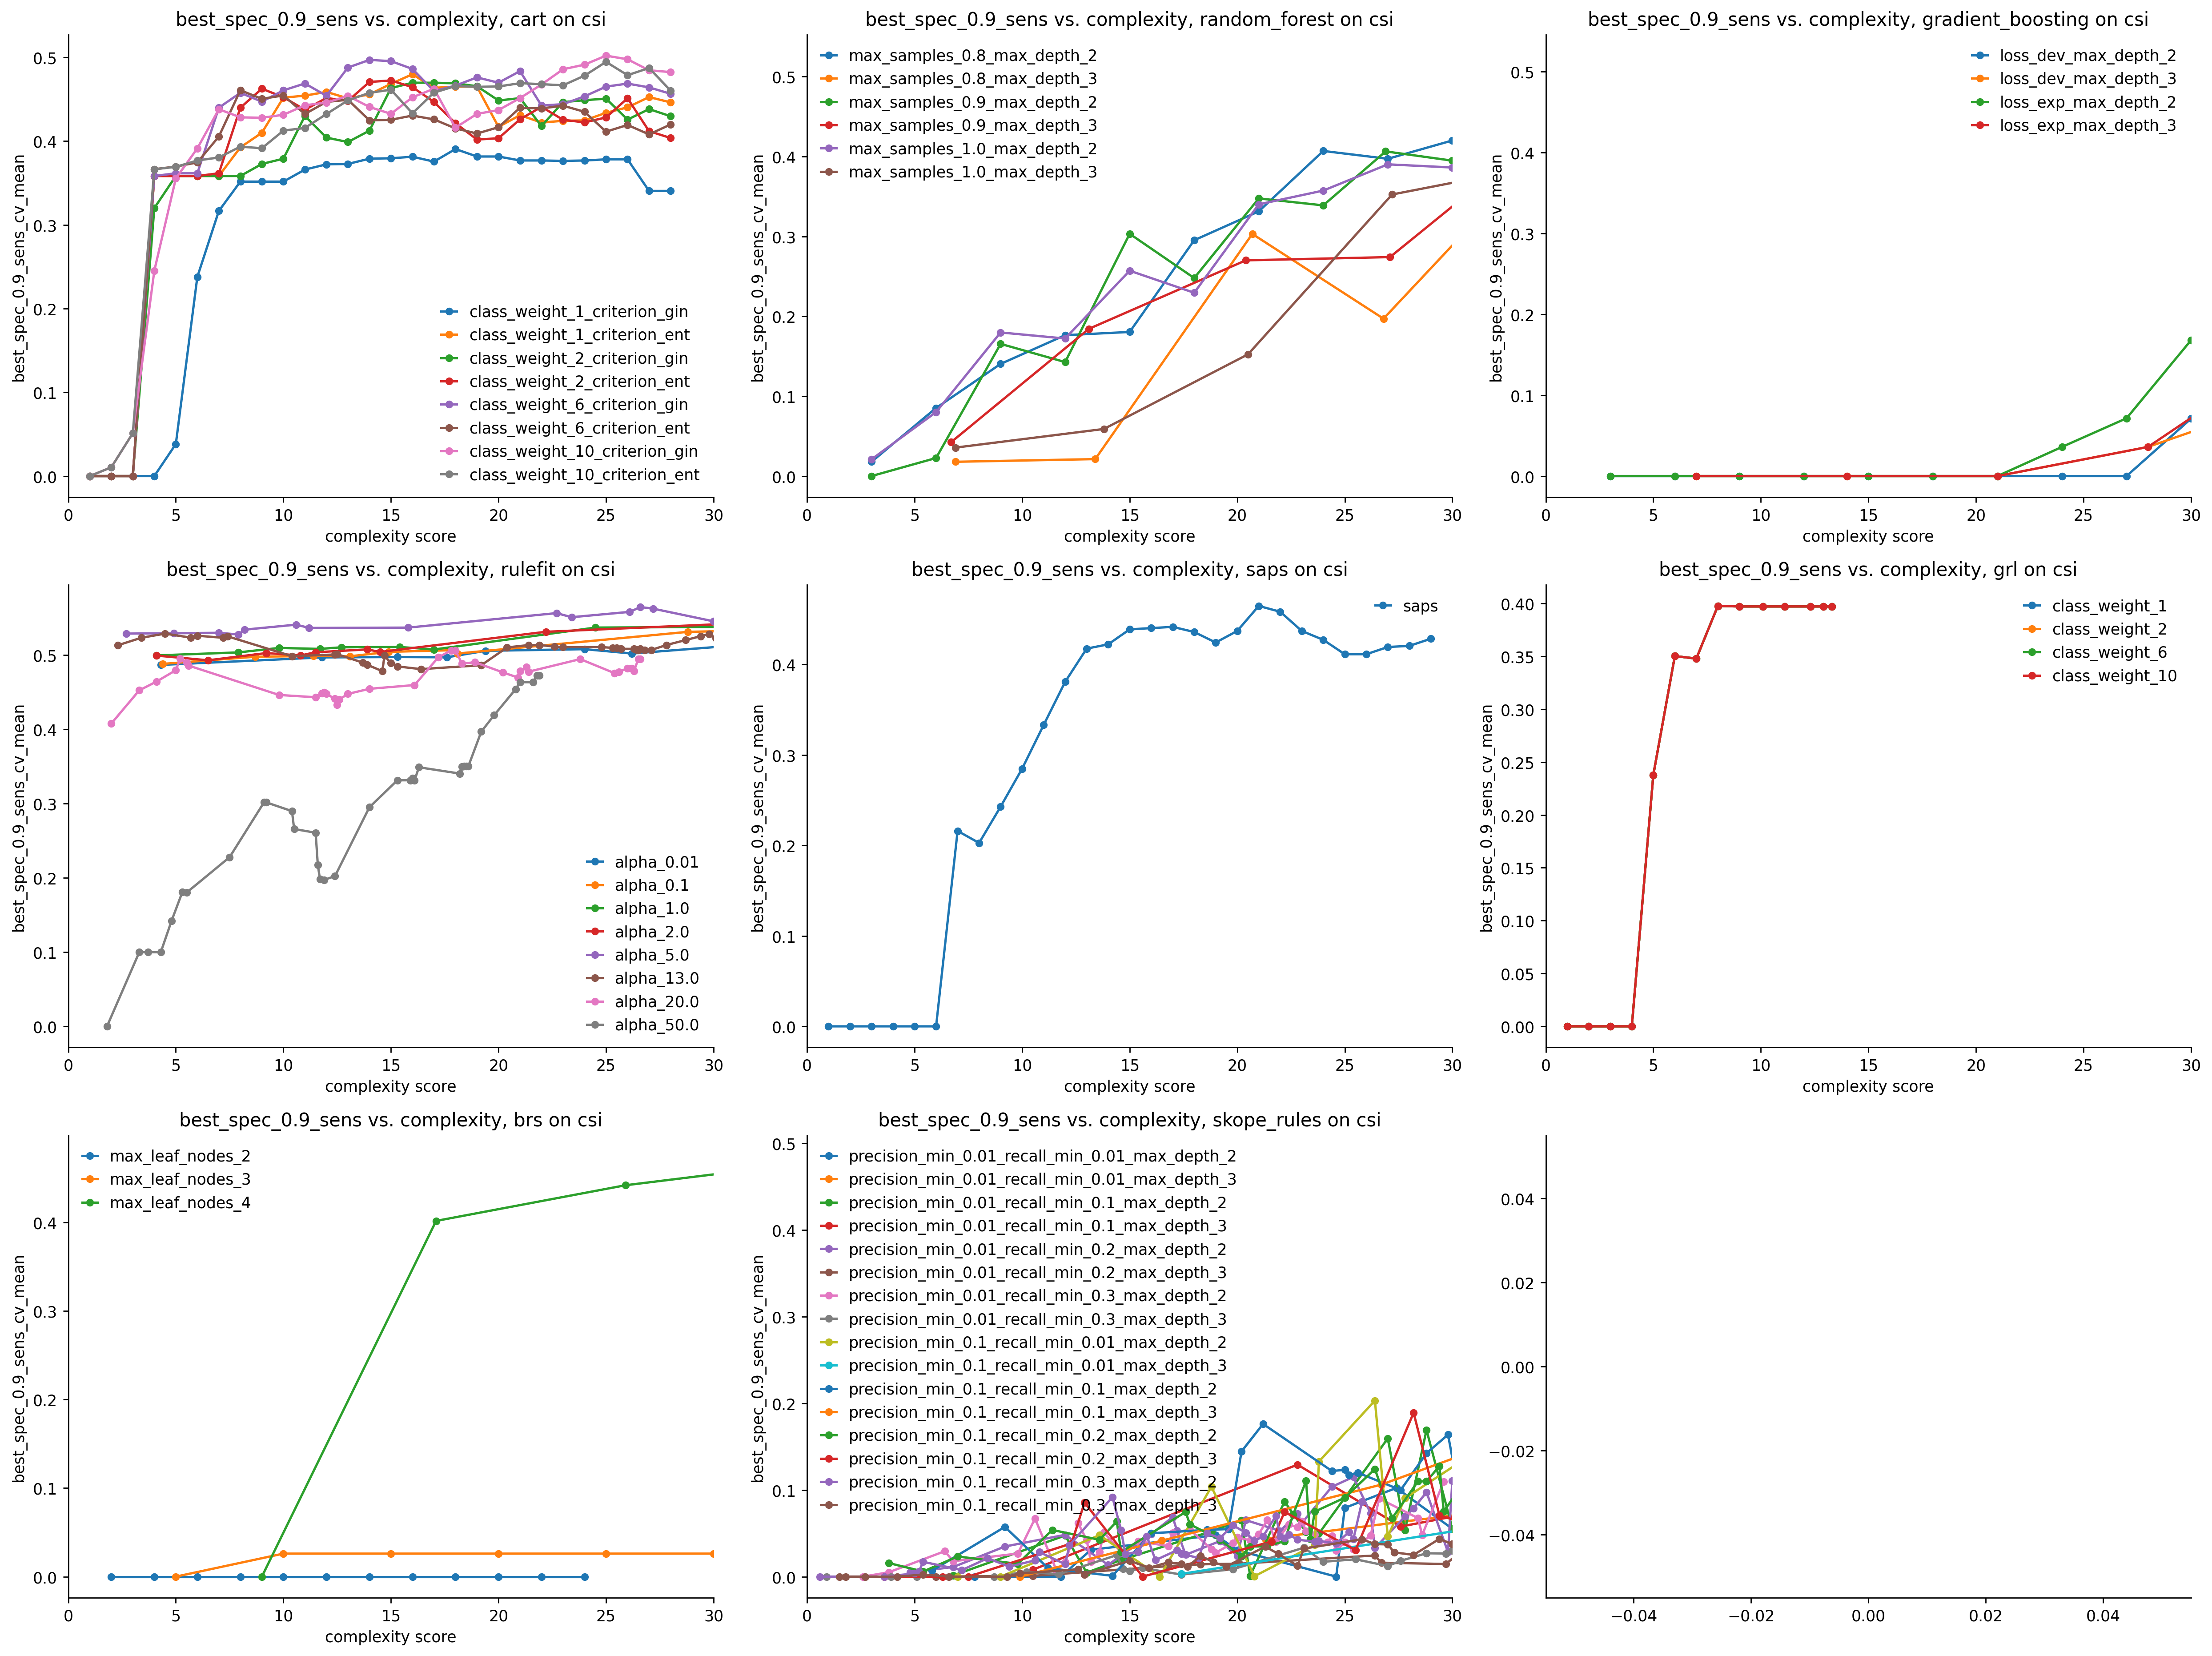

In [9]:
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
for i, model in enumerate(models_to_plot):
    result = pkl.load(open(f'results/rulevetting/csi/cv/{model}_comparisons.pkl', 'rb'))
    viz.viz_model_curves_validation(
        ax=axes[i // n_cols, i % n_cols], result=result, suffix=suffix, metric=metric)
plt.plot()
plt.tight_layout()

In [220]:
model_to_best = {
    'cart': 'class_weight_10_criterion_gin',
    'random_forest': 'max_samples_1.0_max_depth_2',
    'gradient_boosting': 'loss_exp_max_depth_3',
    'rulefit': 'alpha_13.0',
    'saps': 'default',
    'grl': 'class_weight_10',
    'brs': 'max_leaf_nodes_4',
    'skope_rules': 'precision_min_0.1_recall_min_0.1_max_depth_2'
}
suffix = 'test'

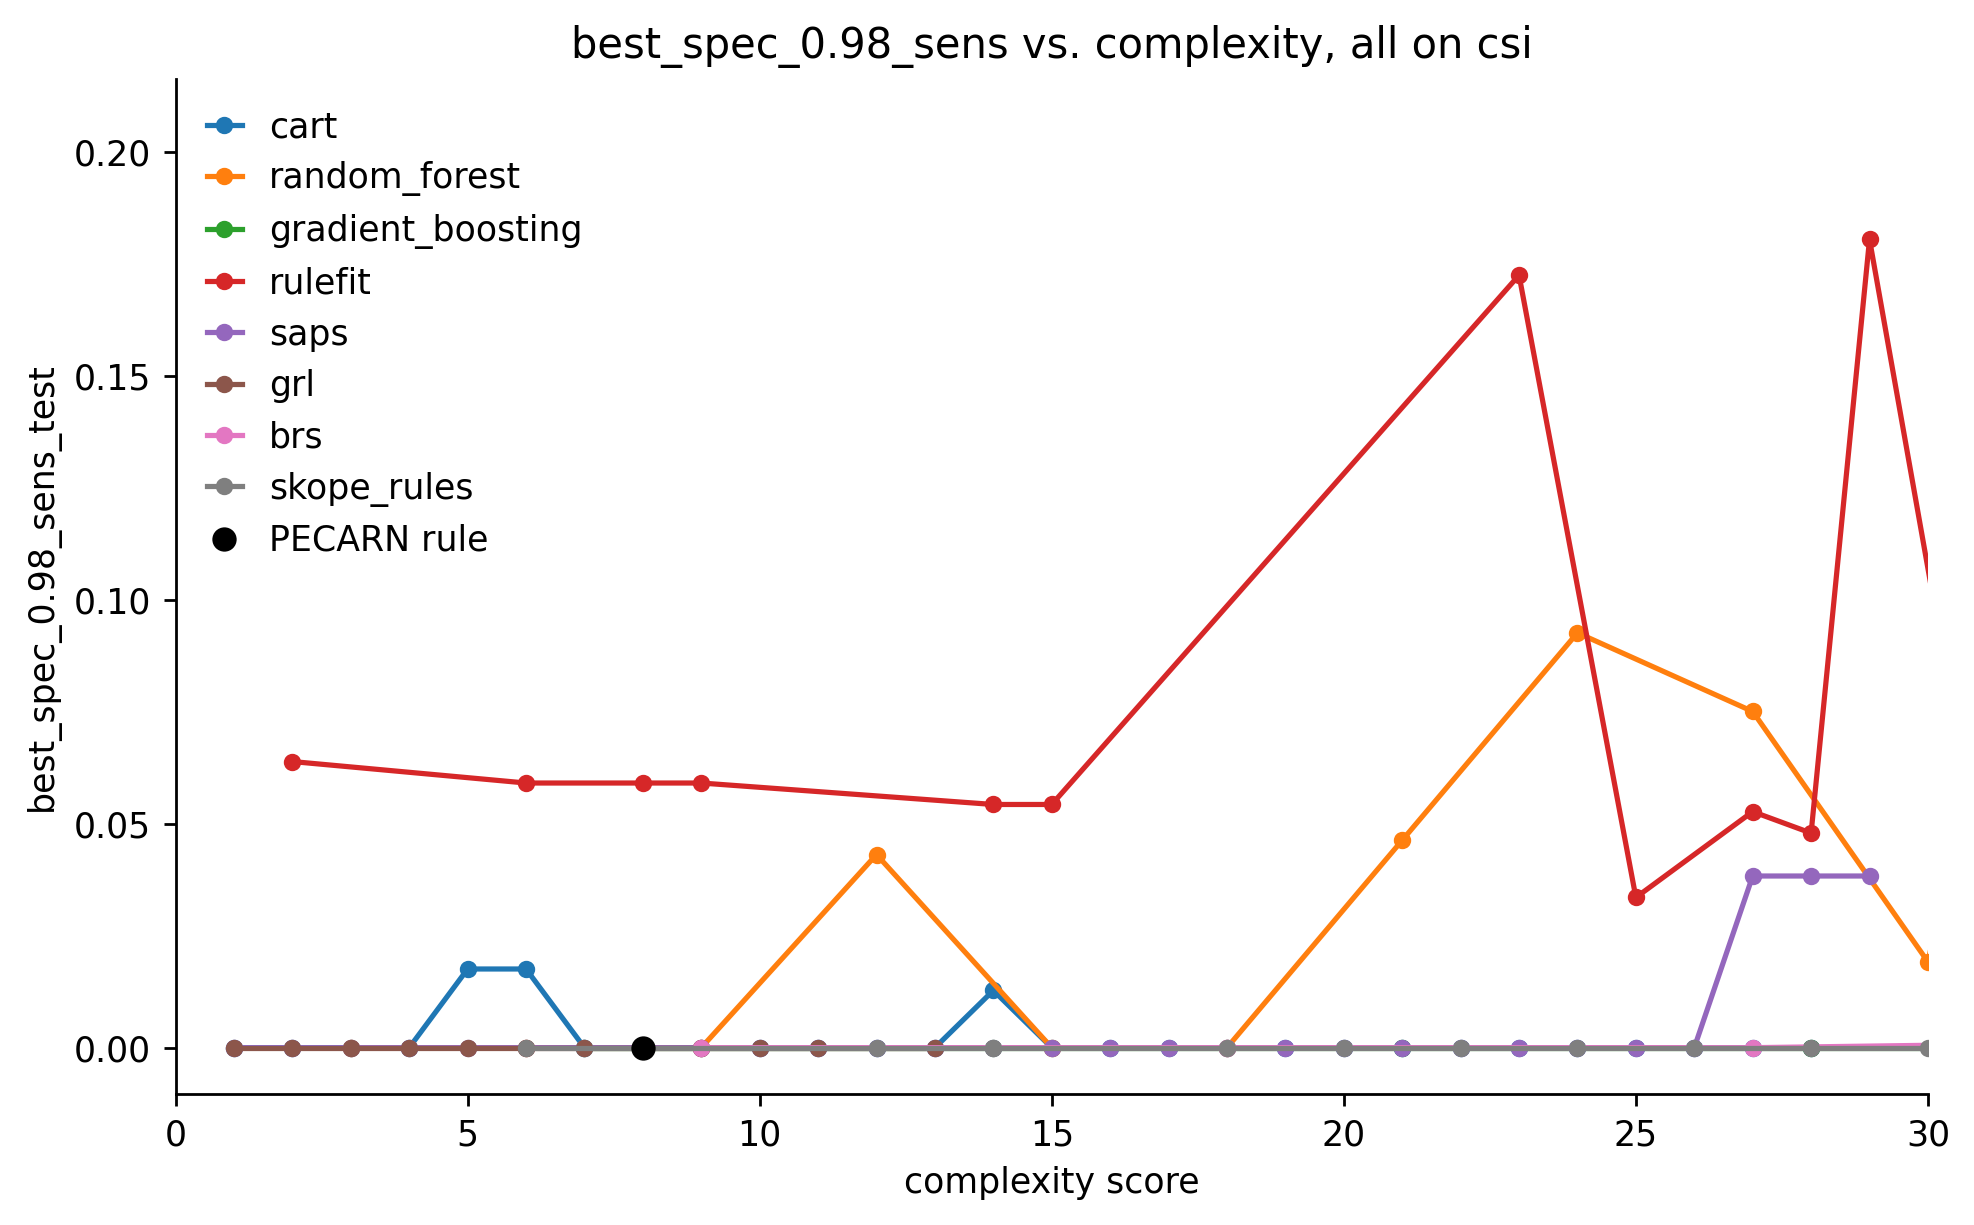

In [221]:
# n_rows, n_cols = 3, 3
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
for i, model in enumerate(models_to_plot):
    result = pkl.load(open(f'results/rulevetting/csi/cv/{model}_comparisons.pkl', 'rb'))
    viz.viz_model_curves_validation(
        ax=ax, result=result, curve_id=model_to_best[model], suffix=suffix, metric=metric)

if '0.9_' in metric:
    ax.plot(8, 0.3658, 'o', color='black', label='PECARN rule')
if '0.95' in metric:
    ax.plot(8, 0.3658, 'o', color='black', label='PECARN rule')
if '0.98' in metric:
    ax.plot(8, 0, 'o', color='black', label='PECARN rule')

ax.legend(frameon=False, handlelength=1)
plt.plot()
plt.tight_layout()

In [ ]:
fname = oj('results', 'rulevetting', 'csi', 'cv/cart_comparisons.pkl')
saps_df = pkl.load(open(fname, 'rb'))['df']
saps_df